In [22]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import random
import os

In [23]:
args = dict()
args['base_path'] = '../data/train'

In [24]:
fn_list = sorted(os.listdir(args['base_path']))
fn_list.remove('keeper')
fn = random.choice(fn_list)
print(fn)

PA000115


In [25]:
img_fn = os.path.join(args['base_path'], fn, 'image', fn + '.nii.gz')
label_fn = os.path.join(args['base_path'], fn, 'label', fn + '.nii.gz')
print(img_fn)
print(label_fn)
assert os.path.isfile(img_fn)
assert os.path.isfile(label_fn)

../data/train\PA000115\image\PA000115.nii.gz
../data/train\PA000115\label\PA000115.nii.gz


In [26]:
def read_nifti(path_to_nifti):
    return nib.load((path_to_nifti)).get_fdata()

In [27]:
img = read_nifti(img_fn)
label = read_nifti(label_fn)

In [7]:
print(img.shape, label.shape)

(512, 512, 390) (512, 512, 390)


In [16]:
flatten = img.flatten()

In [19]:
print(min(flatten))
print(max(flatten))

-1024.0
3071.0


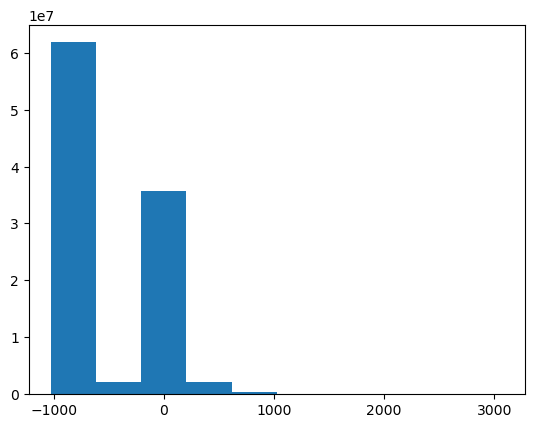

In [13]:
plt.hist(flatten)
plt.show()

In [8]:
def vis(s):
    plt.figure(figsize=(14, 10))
    plt.subplot(1,3,1)
    plt.imshow(img[:, :, s], cmap='gray')
    plt.subplot(1,3,2)
    plt.imshow(label[:, :, s], cmap='gray')
    plt.subplot(1,3,3)
    plt.imshow(img[:, :, s], cmap='gray')
    plt.imshow(label[:, :, s], alpha=0.6, cmap='Greens')
    plt.tight_layout()
    plt.show()

In [9]:
from ipywidgets import interact
import ipywidgets as widgets

interact(vis, ｓ=widgets.IntSlider(min=0, max=img.shape[-1]-1, step=1, value=75));

interactive(children=(IntSlider(value=75, description='s', max=389), Output()), _dom_classes=('widget-interact…